1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [61]:
# Carga de las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
# lectura de datos en Python y carga en data
data = pd.read_csv('C:/Users/sachi/Downloads/heart_cleveland_upload.csv')

In [64]:
# Lectura de datos para analisis exploratorio
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [67]:
# Descripción de los datos
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos thalach')

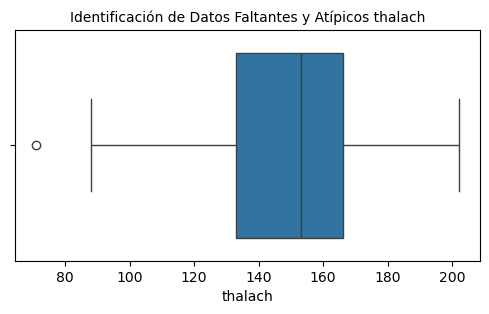

In [69]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos thalach', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos chol')

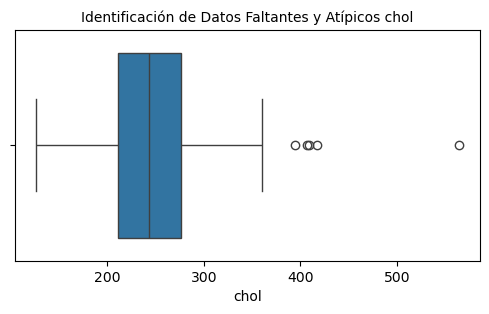

In [70]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos chol', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos trestbps')

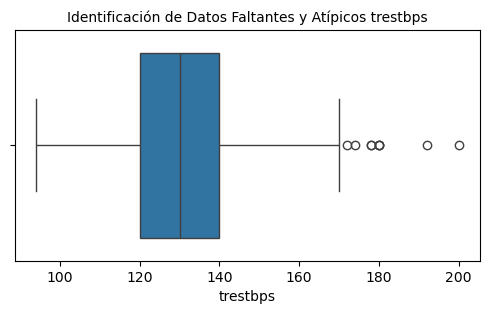

In [73]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos trestbps', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos age')

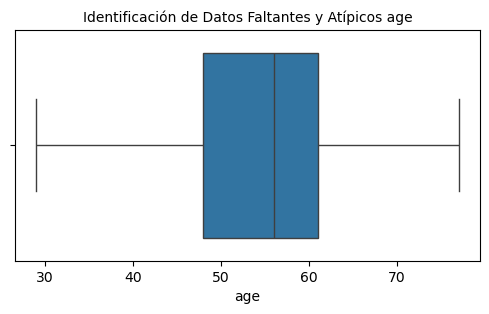

In [75]:
# Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['age'])
plt.title('Identificación de Datos Faltantes y Atípicos age', fontsize=10 )

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [83]:
# No se identifican datos faltantes

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [86]:
# Caracteristica de interes: 
# * condition: Si la persona presenta enfermedades cardiacas (0 = no presenta, 1 = si presenta)

# Total de personas con enfermedad cardiaca

data['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [95]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento
X = data.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition 
Y = data['condition'] # Se cargan los datos de train con los datos de la la columna condition

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [97]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [99]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

5. Entrenar el modelo configurando los diferentes hiperparámetros

In [102]:
# Construir el modelo de regresión logística 
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [104]:
X_test.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2


In [106]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [109]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

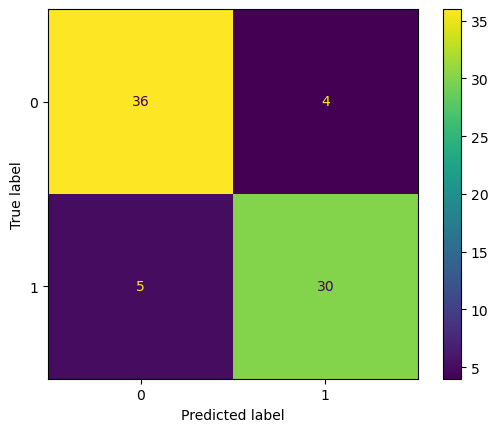

In [112]:
# Matrix de Confusión del modelo
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

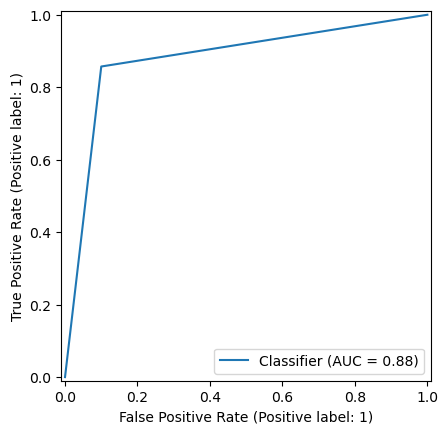

In [114]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:
 * Precisión: La precisión para la clase "condition" (enfermedad cardiaca) es 0.88, lo que significa que el 88% de los predichos como personas con enfermedad cardiaca por el modelo en realidad tenian esa enfermedad.
 * Recall: El Recall para la clase "condition" (enfermedad cardiaca) es 0,86, lo que indica que el modelo identificó correctamente al 86% de todas las personas con enfermedad cardiaca.
 * F1 Score: La puntuación F1 para la clase "condition" (enfermedad cardiaca) es 0,87, lo que indica un equilibrio entre precisión y recall.

De la Matriz de Confusión podemos interpretar:
 * Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 36
 * Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 30
 * Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 4
 * Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 5

De la curva de precisión del modelo se puede interpretar:
 * El AUC es 0,88 lo que significa que el 88% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.